<p style="text-align: center; font-weight: bold;">Practica 5</p>
<p style="text-align: center; font-weight: bold;">Laboratorio de bioseñales</p>
<p style="text-align: center; ">Orman Jesún Contreras</p>
<p style="text-align: center; ">Maria Camila Melan</p>

In [11]:
#Exporto las librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import welch

**4.1	Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. (10%)**

Frecuencia de muestreo mínima necesaria: 320 Hz


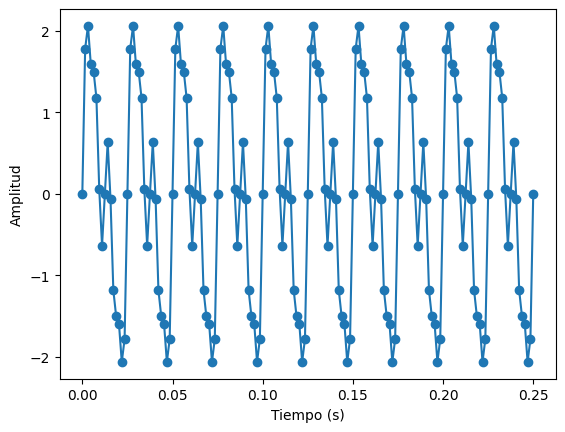

In [2]:
# Defino las frecuencias y amplitudes de las señales sinusoidales
frecuencias = [40, 80, 160]  # Frecuencias en Hz
amplitudes = [1.5, 1, 0.5]     # Amplitudes de las señales

Fo = 4 # Frecuencia fundamental de la señal, mcm
# Calculo la frecuencia de muestreo mínima necesaria (Teorema de Nyquist)
F_minima = 2 * max(frecuencias)
print(f"Frecuencia de muestreo mínima necesaria: {F_minima} Hz")

Fs= 2* F_minima


# Genero el vector de tiempo
Tp = 1/Fo # Periodo de la señal
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T


# Genero la señal como la suma de las componentes sinusoidales
x = sum(A * np.sin(2 * np.pi * f * t) for A, f in zip(amplitudes, frecuencias))

# Graffico la señal 
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()


**4.2	Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal). (10%)**

In [3]:
fft_señal = np.fft.fft(x)  # Transformada de Fourier
N = len(x)  # Número de muestras
frecuencias_fft = np.arange(0,N)*Fs/N # Vector de frecuencias


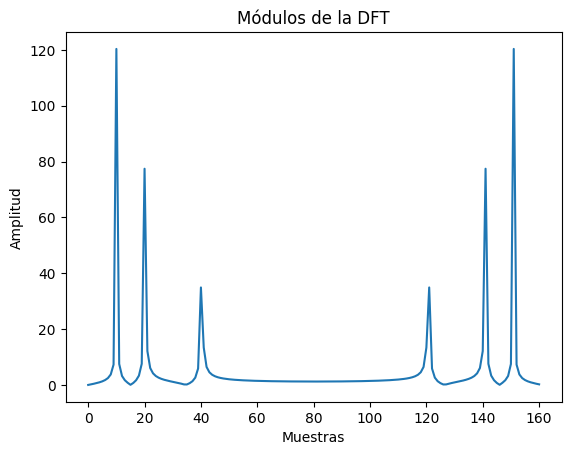

In [4]:
#3.4	Análisis de Fourier en tiempo discreto
plt.plot(abs(fft_señal ))
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


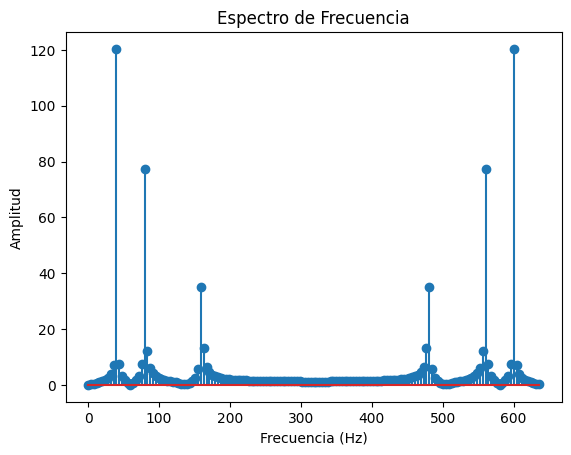

In [5]:
# Grafico el espectro de frecuencia

plt.stem(frecuencias_fft, np.abs(fft_señal ))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de Frecuencia')
plt.show()



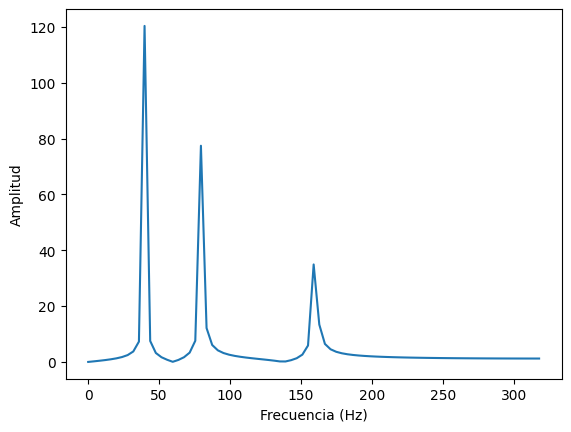

In [6]:
#. Este valor “mitad” de la frecuencia de muestreo también recibe el nombre de frecuencia Nyquist. 
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = fft_señal [0:Nmitad]
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()


**4.3	Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior. (10%)**

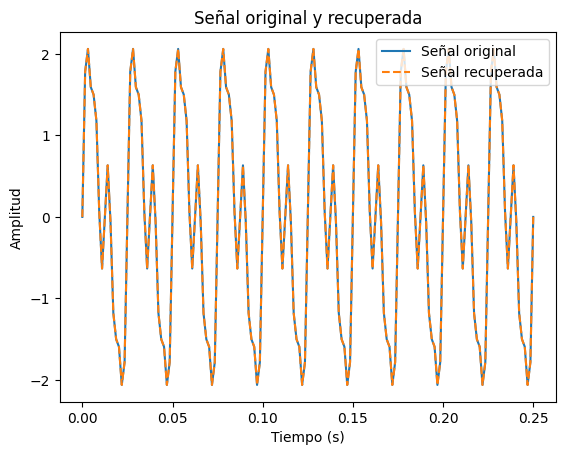

In [7]:
# Aplicar la transformada inversa de Fourier
señal_recuperada = np.fft.ifft(fft_señal)  # Transformada inversa de Fourier

# Grafico la señal original y la señal recuperada, para mirar si el método funciona

plt.plot(t, x, label='Señal original')
plt.plot(t, np.real(señal_recuperada),linestyle='--', label='Señal recuperada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal original y recuperada')
plt.legend()
plt.show()

**4.4	¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué? (10%)*

_F1 = np.fft.fft(x);_

_F2 = np.zeros((len(F1)));_

_F2[9:13] = F1[9:13];_

_xr = np.fft.ifft(F2);_

_fig = plt.figure()_

_ax = fig.add_subplot(111)_

_ax.plot(t, np.real(xr))_

_ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');_

_plt.show()_


Sí, las anteriores líneas de código aplican un filtro a la señal original x, específicamente un tipo de filtro pasabajas. Permite el paso de las frecuencias más bajas (en este caso, las que están en el rango de índices 9 a 12 en el espectro de frecuencia), mientras atenúa o elimina las frecuencias más altas. Esto se logra estableciendo las amplitudes de las frecuencias fuera del rango deseado en cero, lo que efectivamente las elimina de la señal filtrada.

F2[9:13] = F1[9:13]: En esta línea se realiza el filtrado. Se mantienen solo los componentes de frecuencia correspondientes a los índices 9 a 12 (inclusive) del vector F1 y se copian en F2. Esto significa que solo se conservan las frecuencias dentro de un rango específico, actuando como un filtro paso banda.

C:\Users\ORMAN\AppData\Local\Temp\ipykernel_6132\1814981423.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[9:13] = F1[9:13]  # Mantener solo las frecuencias deseadas


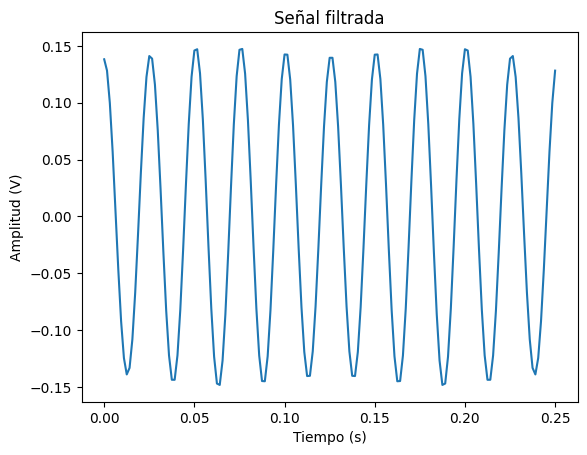

In [9]:
F1 = np.fft.fft(x)  # Transformada de Fourier de la señal

# Las siguientes líneas aplican un filtro paso banda
F2 = np.zeros((len(F1)) ) # Inicializar la señal filtrada
F2[9:13] = F1[9:13]  # Mantener solo las frecuencias deseadas

xr = np.fft.ifft(F2)  # Transformada inversa de Fourier de la señal filtrada

# Graficar la señal filtrada
plt.plot(t, np.real(xr))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.title('Señal filtrada')
plt.show()



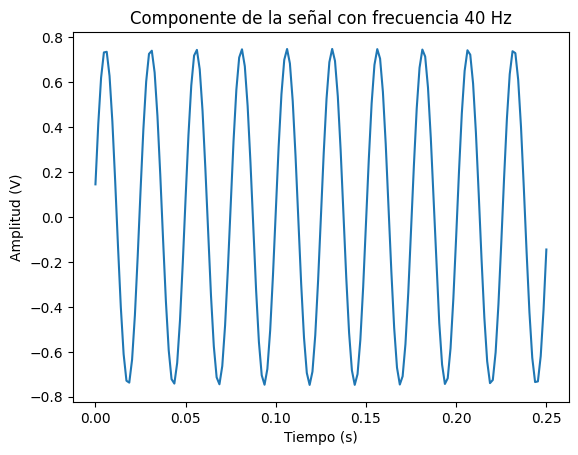

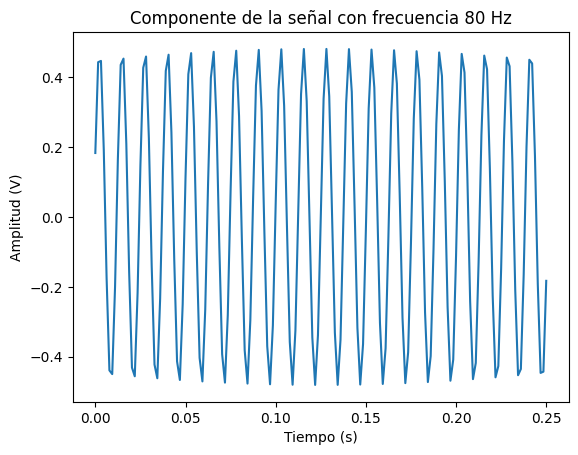

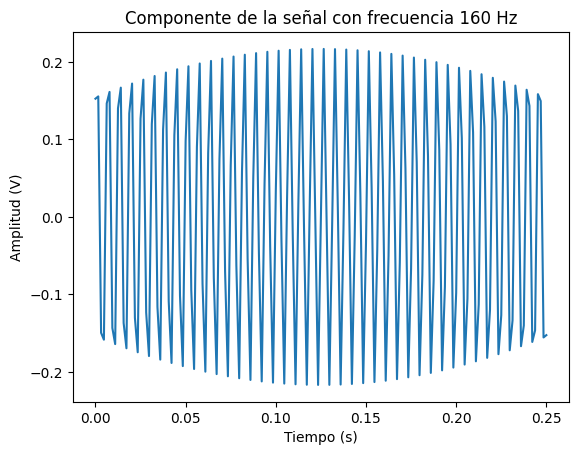

In [10]:
# Extraigo las componentes de la señal de manera similar
for frecuencia in frecuencias: # Itero sobre cada frecuencia en la lista de frecuencias
    F2 = np.zeros_like(F1)  # Inicializar la señal filtrada
    indices = np.where(np.abs(frecuencias_fft - frecuencia) < 1)[0] # Encuentro los índices en el vector de frecuencias frecuencias_fft donde la diferencia
    # absoluta entre la frecuencia actual y las frecuencias en frecuencias_fft es menor que 1
    # Esto permite identificar los índices cercanos a la frecuencia actual.
    F2[indices] = F1[indices]  # Mantener solo la frecuencia deseada
    xr = np.fft.ifft(F2)  # Transformada inversa de Fourier de la señal filtrada

    # Graficar la componente de la señal
    plt.subplot(111)
    plt.plot(t, np.real(xr))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (V)')
    plt.title(f'Componente de la señal con frecuencia {frecuencia} Hz')
    plt.show()

**4.3 El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning,y justificar la elección del solapamiento y el ancho de la ventaja)**

In [12]:
# Cargar datos
mat_contents = sio.loadmat('senecg.mat')
data = mat_contents['ECG']


In [14]:
# Parámetros para el análisis de Welch
fs = 250
nperseg = 256  # Número de puntos en la ventana
window = 'hann'
noverlap = int(nperseg / 2)  # Solapamiento del 50%

In [15]:
# Calcular el periodograma de Welch
f, psd_original = welch(data[:, 0], fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)


(0.0, 100.0)

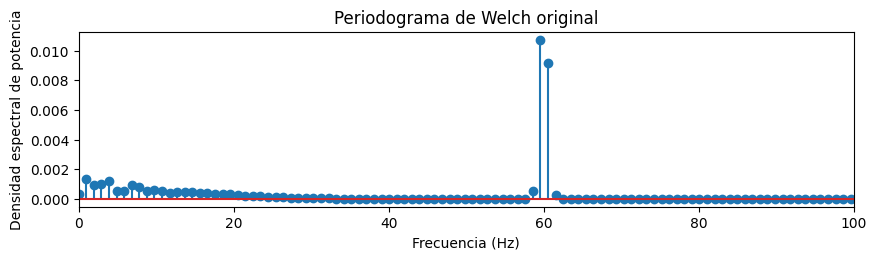

In [16]:
# Graficar el periodograma de Welch original
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.stem(f, psd_original)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch original')
plt.xlim([0, 100])


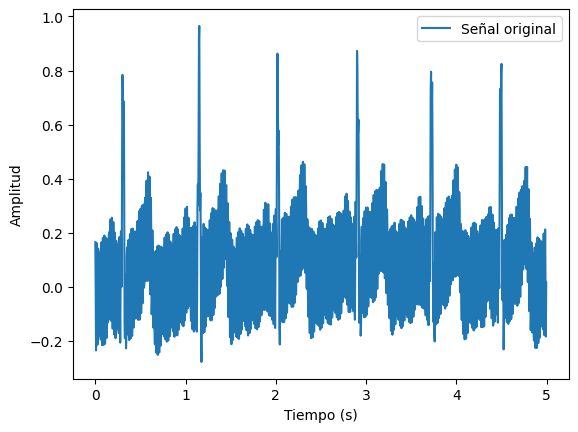

In [17]:
n_samples = 1250
fs = 250
t = np.arange(0, n_samples / fs, 1/fs)
plt.plot(t, data, label='Señal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

C:\Users\ORMAN\AppData\Local\Temp\ipykernel_6132\1506452431.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[11:12] = np.fft.fft(data[:, 0])[11:12]
c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:462: UserWarning: Input data is complex, switching to return_onesided=False
  freqs, Pxx = csd(x, x, fs=fs, window=window, nperseg=nperseg,


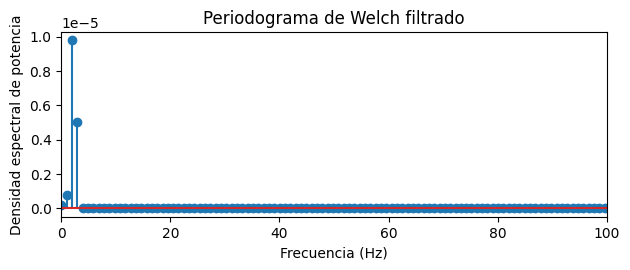

In [20]:
# Eliminar ruido 
F2 = np.zeros_like(data[:, 0])
F2[11:12] = np.fft.fft(data[:, 0])[11:12]
xr = np.fft.ifft(F2)

#Calcular el periodograma de Welch de la señal filtrada
f, psd_filtrado = welch(xr, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

#Graficar el periodograma de Welch de la señal filtrada
plt.subplot(212)
plt.stem(f, psd_filtrado)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch filtrado')
plt.xlim([0, 100])

plt.tight_layout()
plt.show()

c:\Users\ORMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


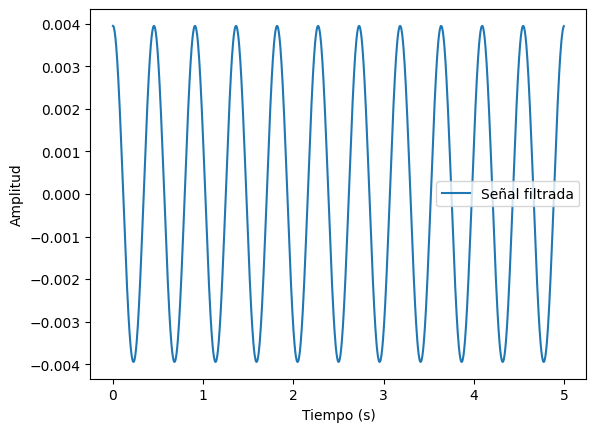

In [21]:
plt.plot(t, xr, label='Señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

**4.5 Realice un análisis de frecuencia a través del periodograma de Welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)**

In [22]:
def cargar_datos(ruta):
    mat_contents = sio.loadmat(ruta)
    data = mat_contents['data']
    return data

In [25]:
ruta_control = 'datos_senales_datos_parkinson_cursos/control/C001R_EP_reposo.mat'
ruta_parkinson = 'datos_senales_datos_parkinson_cursos/parkinson/P001_EP_reposo.mat'


In [26]:
data_control = cargar_datos(ruta_control)
data_parkinson = cargar_datos(ruta_parkinson)

In [27]:
# Parámetros para el análisis de Welch
fs = 1000  # Frecuencia de muestreo de EEG
nperseg = 256  # Número de puntos en la ventana
window = 'hann'
noverlap = int(nperseg / 2)  # Solapamiento del 50%

In [28]:
# Calcular el periodograma de Welch para EEG de paciente control
f_control, psd_control = welch(data_control[0, :, 0], fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Calcular el periodograma de Welch para EEG de paciente con Parkinson
f_parkinson, psd_parkinson = welch(data_parkinson[0, :, 0], fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)


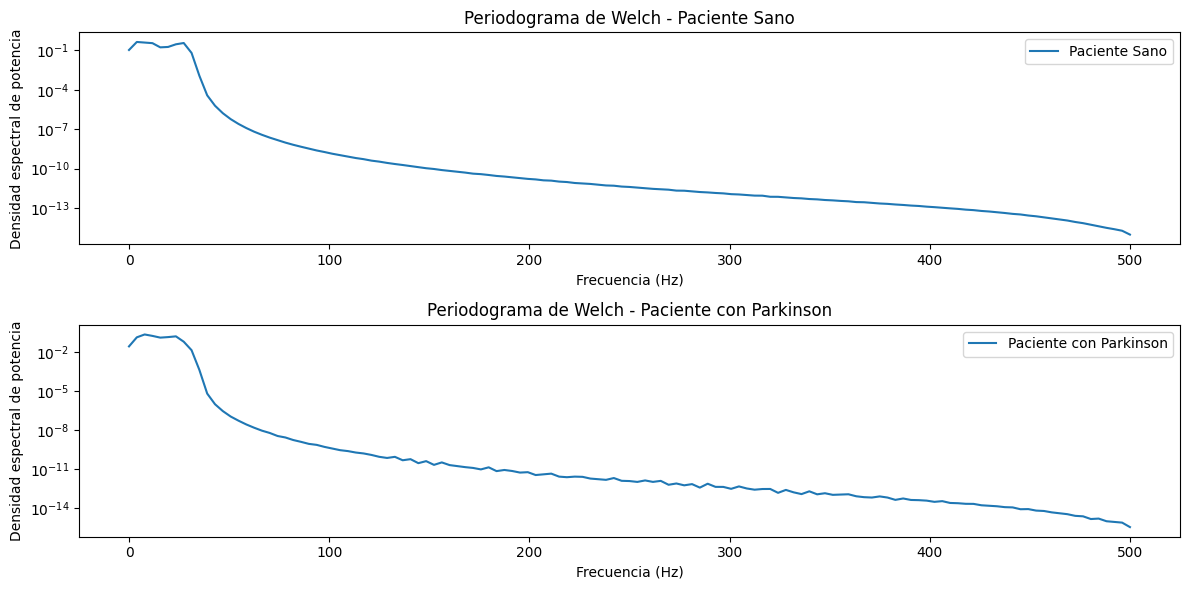

In [31]:
# Graficar los periodogramas de Welch
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.semilogy(f_control, psd_control, label='Paciente Sano')
plt.title('Periodograma de Welch - Paciente Sano')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogy(f_parkinson, psd_parkinson, label='Paciente con Parkinson')
plt.title('Periodograma de Welch - Paciente con Parkinson')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.legend()

plt.tight_layout()
plt.show()

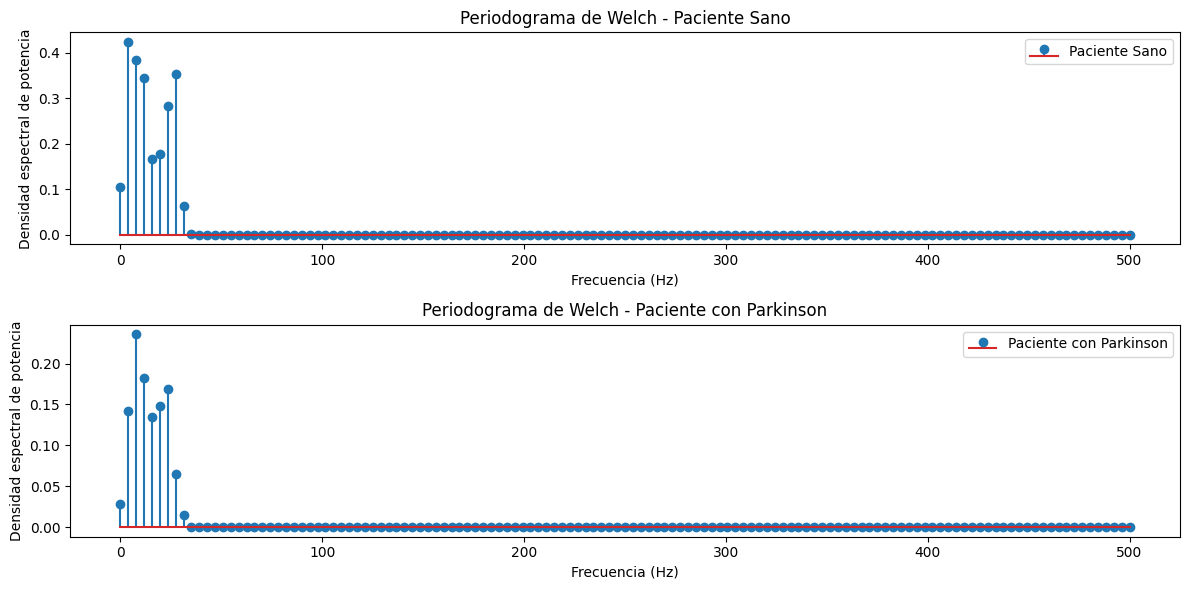

In [32]:
# Graficar los periodogramas de Welch
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(f_control, psd_control, label='Paciente Sano')
plt.title('Periodograma de Welch - Paciente Sano')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(f_parkinson, psd_parkinson, label='Paciente con Parkinson')
plt.title('Periodograma de Welch - Paciente con Parkinson')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.legend()

plt.tight_layout()
plt.show()

Frecuencia de muestreo (fs): La frecuencia de muestreo del EEG suele ser de alrededor de 1000 Hz, por lo que elegí fs=1000 para garantizar una buena resolución en el análisis de frecuencia.
Número de puntos en la ventana (nperseg): El número de puntos en la ventana determina la resolución en frecuencia del periodograma. Un valor de nperseg=256 proporciona una buena resolución sin generar ventanas demasiado grandes que podrían perder información relevante en señales cortas como las de EEG.

<p style="text-align: center; font-weight: bold;">Análisis</p>


- La FFT es un algoritmo eficiente que se utiliza para calcular la Transformada de Fourier Discreta (DFT) de una secuencia finita de datos. En el código, se aplica la FFT a la señal compuesta x mediante la función np.fft.fft(x). La FFT descompone la señal en sus componentes de frecuencia, lo que permite analizar el contenido frecuencial de la señal. 

- Gráfica "Espectro de Frecuencia": Esta gráfica muestra el espectro de frecuencia de la señal compuesta obtenido mediante la FFT. Se pueden observar picos prominentes en las frecuencias 40, 80 y 160 Hz, que corresponden a las frecuencias de las componentes sinusoidales que conforman la señal original. La amplitud de estos picos está relacionada con la amplitud de cada componente sinusoidal.

- La gráfica "Señal original y recuperada" compara la señal original x y la señal recuperada señal_recuperada mediante la Transformada Inversa de Fourier. Se puede observar que ambas señales son prácticamente idénticas, lo que demuestra la efectividad del método de la Transformada de Fourier para descomponer y reconstruir señales.

- La función plt.semilogy representa el eje y en escala logarítmica, lo que es útil para visualizar de manera más clara las diferencias en la potencia de señal en diferentes frecuencias.

- Se evidencia una menor densidad espectral de potencia en pacientes con Parkinson, con respecto a los pacientes sanos, lo que sugiere una disminución en la actividad eléctrica cerebral en ciertas regiones y/o frecuencias. Esta reducción en la densidad de potencia puede estar asociada con la neurodegeneración característica de la enfermedad de Parkinson, que afecta áreas específicas del cerebro involucradas en el control motor y otras funciones cognitivas. Además, la menor densidad de potencia podría reflejar cambios en la conectividad funcional entre diferentes regiones cerebrales, así como posibles efectos de la medicación utilizada para tratar la enfermedad

- Dado que las señales de EEG pueden tener componentes de frecuencia que abarcan varios órdenes de magnitud, utilizar una escala logarítmica puede ayudar a resaltar las características de interés, como picos de frecuencia o bandas de frecuencia específicas, que podrían perderse en una escala lineal. Esto facilita la identificación de diferencias significativas entre las señales de EEG de pacientes sanos y con Parkinson en el análisis comparativo de los periodogramas de Welch.

<p style="text-align: center; font-weight: bold;">Conclusiones</p>

- La Transformada Rápida de Fourier (FFT) es una herramienta poderosa para analizar el contenido frecuencial de una señal, descomponiendo la señal en sus componentes de frecuencia.

- El espectro de frecuencia obtenido mediante la FFT muestra los picos correspondientes a las frecuencias de las componentes sinusoidales que conforman la señal original, y la amplitud de estos picos está relacionada con la amplitud de cada componente.

- La Transformada Inversa de Fourier permite recuperar la señal original a partir de su representación en el dominio de la frecuencia obtenida mediante la FFT, lo que demuestra la reversibilidad del proceso de la Transformada de Fourier.
Las gráficas proporcionan una representación visual del proceso de análisis y reconstrucción de señales mediante la Transformada de Fourier y su inversa.

-  El análisis de señales de ECG con métodos como el de Welch y técnicas de filtrado resulta de gran ayuda para mejorar la calidad de los datos, identificar características relevantes y facilitar el diagnóstico y seguimiento de trastornos cardíacos. Esto tiene importantes implicaciones en la investigación clínica. 

- La representación logarítmica facilita la identificación de diferencias significativas entre las señales de EEG de pacientes sanos y con Parkinson en el análisis comparativo de los periodogramas de Welch.
Esto permite una mejor comprensión de las alteraciones en la actividad cerebral asociadas a la enfermedad de Parkinson.

- La función plt.semilogy se convierte en una herramienta valiosa para el análisis de señales de EEG, particularmente en el contexto de la enfermedad de Parkinson.
Su uso permite una visualización más clara y precisa de las diferencias en la potencia de la señal, facilitando la identificación de patrones y características relevantes para el diagnóstico y seguimiento de la enfermedad.

*Referencias:*

[1] J. G. Proakis and D. G. Manolakis, "Digital Signal Processing: Principles, Algorithms, and Applications", 4th ed. Englewood Cliffs, NJ, USA: Prentice-Hall, 2007. [En línea]. Disponible en: https://www.pearson.com/us/higher-education/program/Proakis-Digital-Signal-Processing-Principles-Algorithms-and-Applications-4th-Edition/PGM199517.html

[2] S. W. Smith, "The Scientist and Engineer's Guide to Digital Signal Processing", 2nd ed. San Diego, CA, USA: California Technical Publishing, 1999. [En línea]. Disponible en: https://www.dspguide.com/